In [1]:
import fitz

In [2]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    # 打开PDF文件
    document = fitz.open(pdf_path)
    
    text = ""
    # 遍历每一个页面
    for page_num in range(len(document)):
        page = document.load_page(page_num)  # 加载页面
        text += page.get_text()  # 提取文本并添加到text变量中
    
    return text

In [ ]:
for file in files:
     extracted_text = extract_text_from_pdf(file)
     if len(extracted_text)<200:
             continue
     with open(r"E:\Code\紫晶衍生物\AI文献\text.txt","a+",encoding="utf-8") as f:
             f.write(extracted_text)

In [44]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 打开图片
image_path = r"E:\Code\紫晶衍生物\AI文献\气泡1.png"  # 替换为你的图片路径
mask = Image.open(image_path)
# 将图片转换为NumPy数组
mask_np = np.array(mask)
# 定义停用词（可以添加自定义停用词）
stopwords = set(STOPWORDS)  # 默认英文停用词
stopwords.update(["et", "al","doi","org","https","used","due","shown","using","Fig","increase","one","mA","cm",
                 "use","thu","non","may"])  # 添加额外停用词
def generate_wordcloud(text):
    # 创建WordCloud对象
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',  # 背景颜色
        colormap='viridis',        # 颜色方案
        max_words=200,             # 最大显示词数
        contour_width=3,           # 轮廓宽度
        contour_color='steelblue', # 轮廓颜色
        stopwords=stopwords,            # 停用词（可以设置为set(['and', 'the']）等）
        mask=mask_np,
    ).generate(text)

    # 显示词云
    plt.figure(figsize=(10, 5),dpi=300)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 隐藏坐标轴
    plt.show()

    # 保存词云图片（可选）
    wordcloud.to_file(r"E:\Code\紫晶衍生物\AI文献\wordcloud.png")

# 生成词频统计（可选）
def word_frequency(text):
    words = text.split()
    word_counts = Counter(words)
    for word, count in word_counts.most_common(10):
        print(f"{word}: {count}")

In [9]:
with open(r"E:\Code\紫晶衍生物\AI文献\text.txt","r",encoding="utf-8") as f:
    text=f.read()

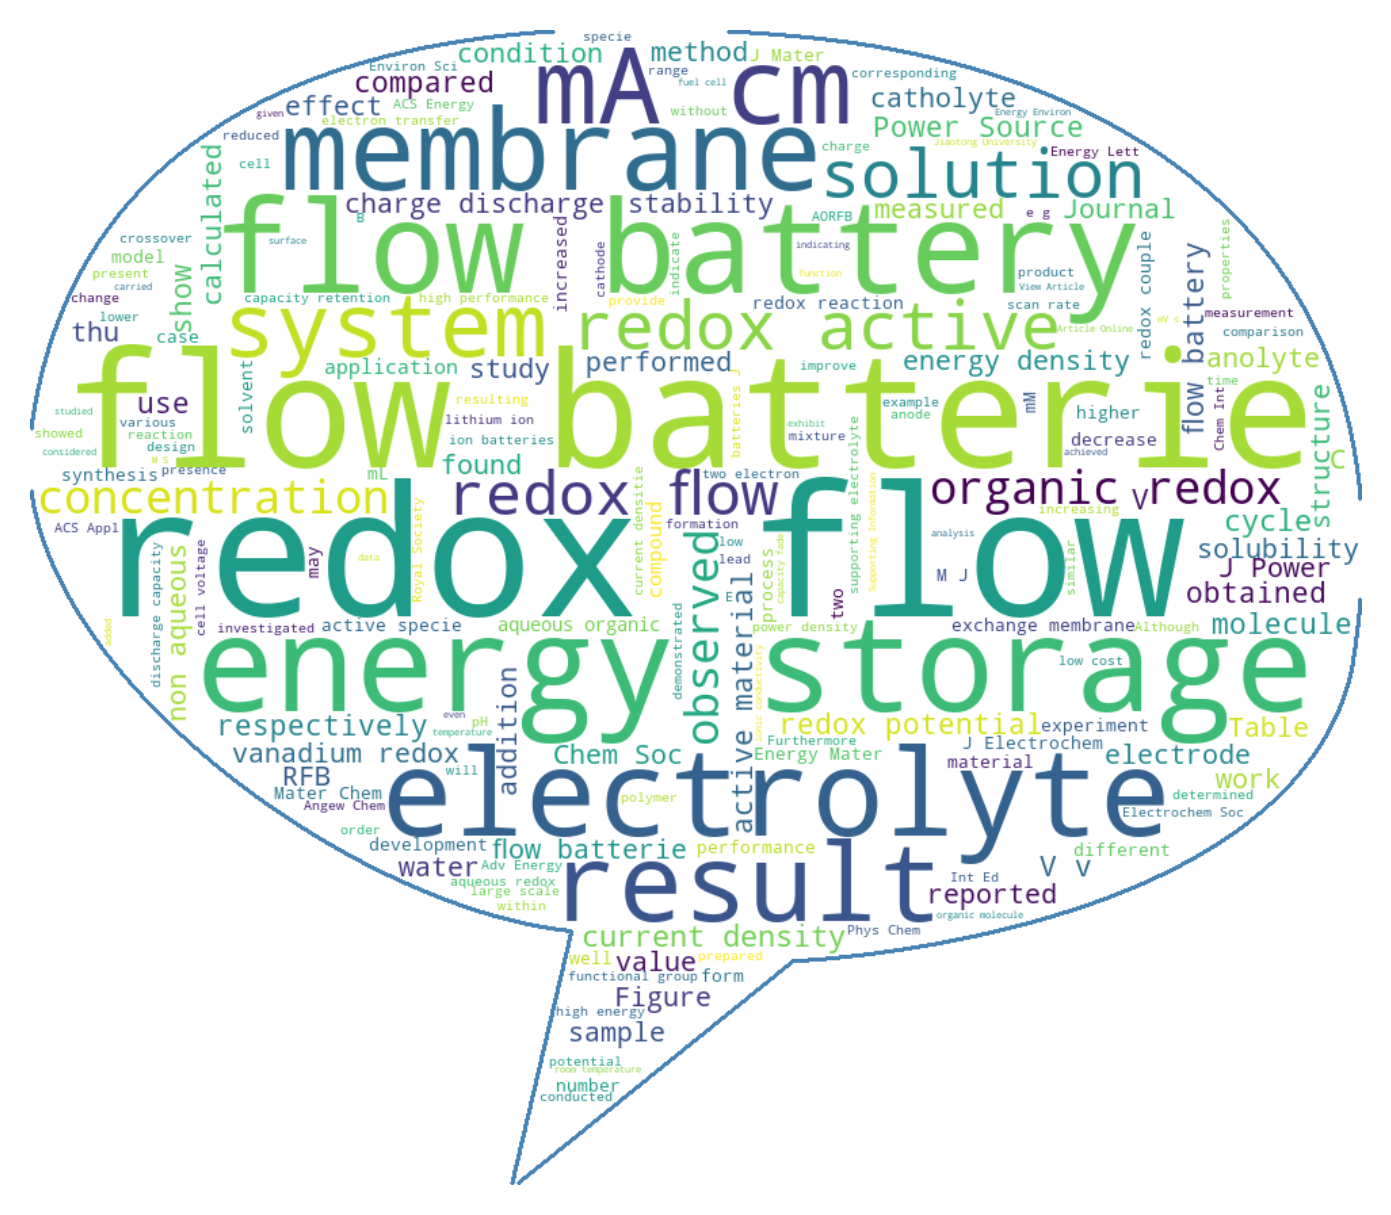

the: 399815
of: 294546
and: 236671
in: 130188
to: 114733
a: 104985
for: 80602
is: 66417
with: 66226
The: 65687


In [45]:
# 调用函数
generate_wordcloud(text)
word_frequency(text)  # 可选：打印词频